<a href="https://colab.research.google.com/github/chetzkmr/Fraudulent-ATM-transaction-Detection/blob/main/Fraud_detection_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Banking Fraud Detection



In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
geo = pd.read_csv('/content/drive/MyDrive/Banking Domain/Copy of Geo_scores.csv')
instance = pd.read_csv('/content/drive/MyDrive/Banking Domain/Copy of instance_scores.csv')
lambdawts = pd.read_csv('/content/drive/MyDrive/Banking Domain/Copy of Lambda_wts.csv')
qset = pd.read_csv('/content/drive/MyDrive/Banking Domain/Copy of Qset_tats.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Banking Domain/Copy of test_share.csv')
train_data = pd.read_csv('/content/drive/MyDrive/Banking Domain/Copy of train.csv')

In [3]:
geo.head()

,id,geo_score
0,26674,4.48
1,204314,4.48
2,176521,5.17
3,48812,-2.41
4,126870,6.55


In [4]:
instance.head()

,id,instance_scores
0,173444,-0.88
1,259378,1.50
2,161170,0.44
3,191161,0.76
4,34521,-0.84


In [5]:
lambdawts.head()

,Group,lambda_wt
0,Grp936,3.41
1,Grp347,-2.88
2,Grp188,0.39
3,Grp1053,-2.75
4,Grp56,-0.83


In [6]:
qset.head()

,id,qsets_normalized_tat
0,9983,2.41
1,266000,3.10
2,77525,1.03
3,160765,-11.63
4,138220,-4.48


In [7]:
test_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT
0,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,...,0.786667,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500
1,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,...,0.636667,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125
2,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,...,0.626667,0.756667,0.953333,0.623333,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200
3,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,...,0.480000,0.460000,0.260000,0.800000,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875
4,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,...,0.706667,0.740000,0.823333,0.670000,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200


In [8]:
train_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.680000,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.716667,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.690000,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.720000,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.603333,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0


From the above observation, we have to merge all these files together for better processing

In [9]:
#Checking the shape of the datasets
print(geo.shape)
print()
print(instance.shape)
print()
print(lambdawts.shape)
print()
print(qset.shape)
print()
print(test_data.shape)
print()
print(train_data.shape)

(1424035, 2)

(1424035, 2)

(1400, 2)

(1424035, 2)

(56962, 27)

(227845, 28)


In [10]:
# Checking different columns
print(geo.columns)
print()
print(instance.columns)
print()
print(lambdawts.columns)
print()
print(qset.columns)
print()
print(test_data.columns)
print()
print(train_data.columns)

Index(['id', 'geo_score'], dtype='object')

Index(['id', 'instance_scores'], dtype='object')

Index(['Group', 'lambda_wt'], dtype='object')

Index(['id', 'qsets_normalized_tat'], dtype='object')

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT'],
      dtype='object')

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target'],
      dtype='object')


In [11]:
print("geo id", geo['id'].nunique())
print()
print("instance id", instance['id'].nunique())
print()
print("Lambda Group", lambdawts['Group'].nunique())
print()
print("qset id", qset['id'].nunique())
print()
print("Test id", test_data['id'].nunique())
print()
print("Train Id", train_data['id'].nunique())
print()
print("Test Group", test_data['Group'].nunique())
print()
print("Train Group",train_data['Group'].nunique())

geo id 284807

instance id 284807

Lambda Group 1400

qset id 284807

Test id 56962

Train Id 227845

Test Group 915

Train Group 1301


To merge the datasets; we can see the column 'id' is common in all the datasets except lambda_wt dataset, which has group column common with test_data and train_data sets, we can merge using this column



In [12]:
#Adding a column to test data and train data
test_data['data']='test'
train_data['data']='train'

In [13]:
test_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,data
0,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,...,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,test
1,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,...,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,test
2,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,...,0.756667,0.953333,0.623333,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200,test
3,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,...,0.460000,0.260000,0.800000,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875,test
4,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,...,0.740000,0.823333,0.670000,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200,test


In [14]:
train_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0,train
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0,train
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0,train
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0,train


Adding train and test data together

In [15]:
df=pd.concat([train_data, test_data], axis=0)

In [16]:
df.head(-1)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56956,256138,Grp457,-0.223333,1.543333,0.550000,2.090000,0.436667,0.843333,0.433333,1.236667,...,0.866667,0.546667,0.550000,0.860000,0.893333,0.383333,0.610000,-244.0800,NaN,test
56957,18333,Grp102,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,...,0.433333,0.660000,0.776667,0.610000,0.690000,0.750000,0.700000,-249.5050,NaN,test
56958,244207,Grp504,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,...,0.870000,0.683333,0.690000,0.640000,0.883333,0.663333,0.660000,-248.7525,NaN,test
56959,103277,Grp78,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,...,0.063333,0.753333,0.780000,0.603333,0.880000,0.643333,0.676667,-231.0500,NaN,test


In [17]:
df.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data'],
      dtype='object')

In [18]:
print('df id', df['id'].nunique())
print()
print('df group', df['Group'].nunique())

df id 284807

df group 1400


In [19]:
#Checking for null values
print(geo.isnull().sum())
print()
print(instance.isnull().sum())
print()
print(lambdawts.isnull().sum())
print()
print(qset.isnull().sum())
print()
print(df.isnull().sum())


id               0
geo_score    71543
dtype: int64

id                 0
instance_scores    0
dtype: int64

Group        0
lambda_wt    0
dtype: int64

id                           0
qsets_normalized_tat    103201
dtype: int64

id                    0
Group                 0
Per1                  0
Per2                  0
Per3                  0
Per4                  0
Per5                  0
Per6                  0
Per7                  0
Per8                  0
Per9                  0
Dem1                  0
Dem2                  0
Dem3                  0
Dem4                  0
Dem5                  0
Dem6                  0
Dem7                  0
Dem8                  0
Dem9                  0
Cred1                 0
Cred2                 0
Cred3                 0
Cred4                 0
Cred5                 0
Cred6                 0
Normalised_FNT        0
Target            56962
data                  0
dtype: int64


geo and qset has maximum amount of null values

In [20]:
print(geo.describe())
print()
print(qset.describe())

                 id     geo_score
count  1.424035e+06  1.352492e+06
mean   1.424030e+05 -9.279168e-06
std    8.221673e+04  7.827199e+00
min    0.000000e+00 -1.093900e+02
25%    7.120100e+04 -5.860000e+00
50%    1.424030e+05  1.800000e-01
75%    2.136050e+05  5.860000e+00
max    2.848060e+05  4.581000e+01

                 id  qsets_normalized_tat
count  1.424035e+06          1.320834e+06
mean   1.424030e+05          1.094006e-05
std    8.221673e+04          7.731794e+00
min    0.000000e+00         -1.404400e+02
25%    7.120100e+04         -5.860000e+00
50%    1.424030e+05          2.000000e-02
75%    2.136050e+05          5.860000e+00
max    2.848060e+05          6.110000e+01


we will fill na values with median



In [21]:
geo['geo_score']=geo['geo_score'].fillna(geo['geo_score'].median())
qset['qsets_normalized_tat']=qset['qsets_normalized_tat'].fillna(qset['qsets_normalized_tat'].median())

In [22]:
geo.isnull().sum()

id           0
geo_score    0
dtype: int64

In [23]:
qset.isnull().sum()

id                      0
qsets_normalized_tat    0
dtype: int64

In [24]:
geo.shape

(1424035, 2)

In [25]:
geo['id'].nunique()

284807

In [26]:
#Calculating mean by grouping id
geo=geo.groupby('id').mean()

In [27]:
geo.shape

(284807, 1)

In [28]:
geo

,geo_score
id,
0,-0.620
1,1.106
2,0.070
3,0.180
4,0.540
...,...
284802,2.710
284803,0.956
284804,0.060


In [29]:
#calculating the mean of qset by grouping by id
qset=qset.groupby('id').mean()

In [30]:
qset.shape

(284807, 1)

In [31]:
instance.shape

(1424035, 2)

In [32]:
#calculating the mean of instance by grouping by id
instance=instance.groupby('id').mean()

In [33]:
instance.shape

(284807, 1)

In [34]:
lambdawts.head()

,Group,lambda_wt
0,Grp936,3.41
1,Grp347,-2.88
2,Grp188,0.39
3,Grp1053,-2.75
4,Grp56,-0.83


In [35]:
print(geo.shape)
print()
print(instance.shape)
print()
print(lambdawts.shape)
print()
print(qset.shape)
print()
print(df.shape)


(284807, 1)

(284807, 1)

(1400, 2)

(284807, 1)

(284807, 29)


In [36]:
#Now merging geo to df
df=pd.merge(df,geo, on='id', how='left')

In [37]:
df.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train,0.256
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train,-0.250
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.950
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.490
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.850


In [38]:
#Now merging instance to df
df=pd.merge(df,instance, on='id', how='left')

In [39]:
df.head(1)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores
0,112751,Grp169,1.07,0.58,0.48,0.766667,1.233333,1.993333,0.34,1.01,...,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0.0,train,0.256,-0.06


In [40]:
#merging qset on df
df=pd.merge(df, qset, on='id', how='left')

In [41]:
df.head(1)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,qsets_normalized_tat
0,112751,Grp169,1.07,0.58,0.48,0.766667,1.233333,1.993333,0.34,1.01,...,0.933333,0.603333,0.686667,0.673333,-245.75,0.0,train,0.256,-0.06,-0.7


In [42]:
#merging lambdawts on df
df=pd.merge(df, lambdawts, on='Group', how='left')

In [43]:
df.head(1)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,112751,Grp169,1.07,0.58,0.48,0.766667,1.233333,1.993333,0.34,1.01,...,0.603333,0.686667,0.673333,-245.75,0.0,train,0.256,-0.06,-0.7,-0.13


In [44]:
df['lambda_wt'].count()

284807

In [45]:
df['lambda_wt'].nunique()

1400

In [46]:
train_data=df[df['data']=='train']
test_data=df[df['data']=='test']

In [47]:
train_data.head(1)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,112751,Grp169,1.07,0.58,0.48,0.766667,1.233333,1.993333,0.34,1.01,...,0.603333,0.686667,0.673333,-245.75,0.0,train,0.256,-0.06,-0.7,-0.13


In [48]:
test_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
227845,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,...,0.796667,0.823333,0.783333,-249.7500,NaN,test,0.25,-0.04,-0.426,0.76
227846,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,...,0.630000,0.673333,0.673333,-249.8125,NaN,test,0.43,-0.77,-0.620,0.18
227847,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,...,0.596667,0.680000,0.670000,-248.1200,NaN,test,1.32,0.11,-0.406,0.39
227848,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,...,0.320000,0.676667,0.660000,-222.9875,NaN,test,-2.11,0.33,0.374,1.80
227849,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,...,0.546667,0.650000,0.663333,-196.2200,NaN,test,-2.11,-0.37,-0.130,1.89


In [49]:
train_data.shape

(227845, 33)

In [50]:
  test_data.shape

(56962, 33)

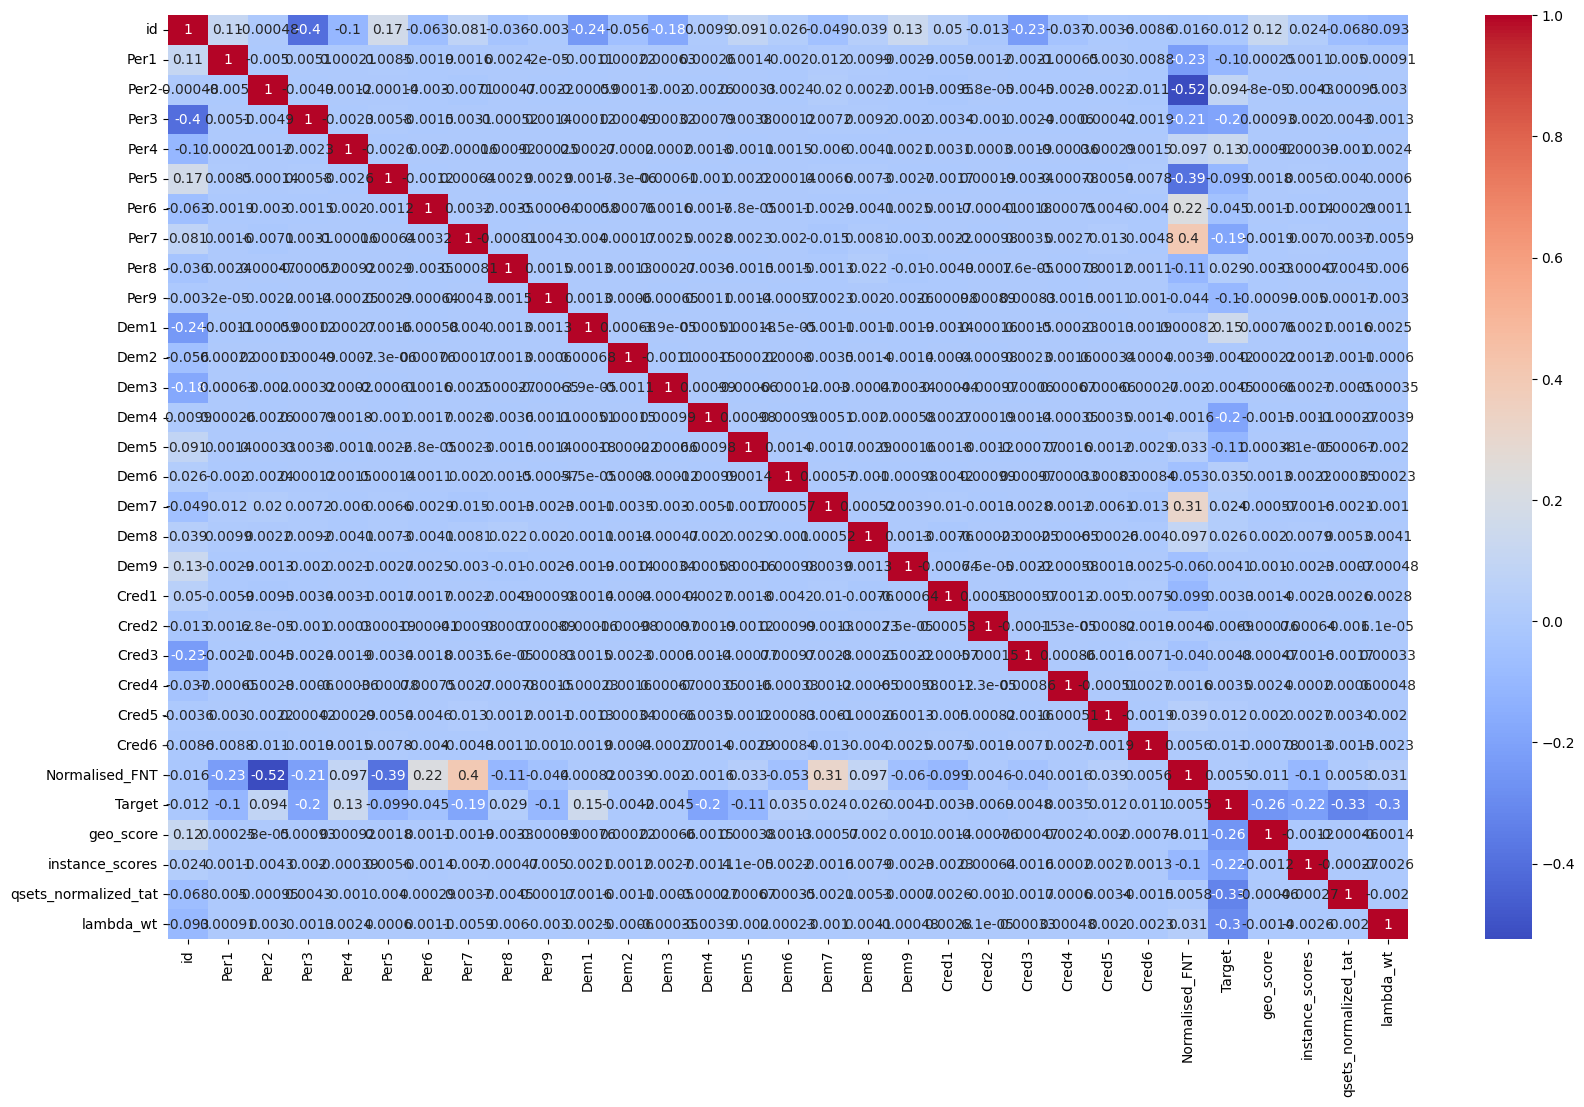

In [51]:
plt.figure(figsize=(20,12))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [52]:
# splitting the data into independent and dependent variable
x = train_data.drop(['id', 'Group','Target', 'data'], axis=1) # ind variable
y = train_data['Target'] # dependent

In [53]:
x.head(1)

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,1.07,0.58,0.48,0.766667,1.233333,1.993333,0.34,1.01,0.863333,0.46,...,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0.256,-0.06,-0.7,-0.13


In [54]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Target, dtype: float64

In [55]:
test_data = test_data.drop(['id','Group','Target','data'], axis=1)

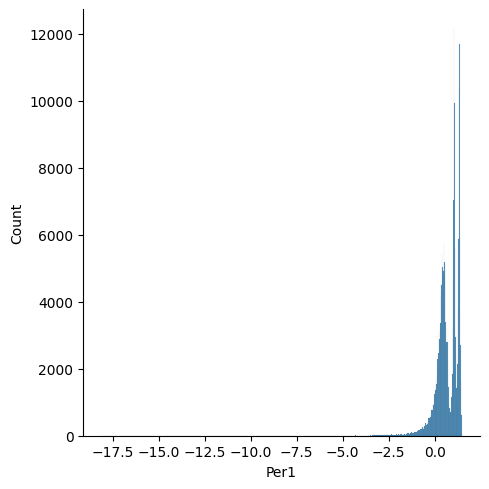

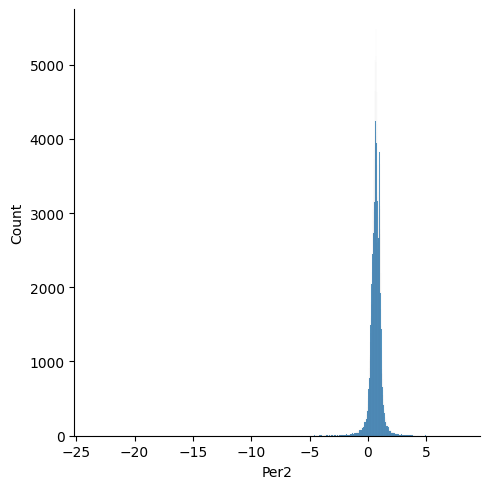

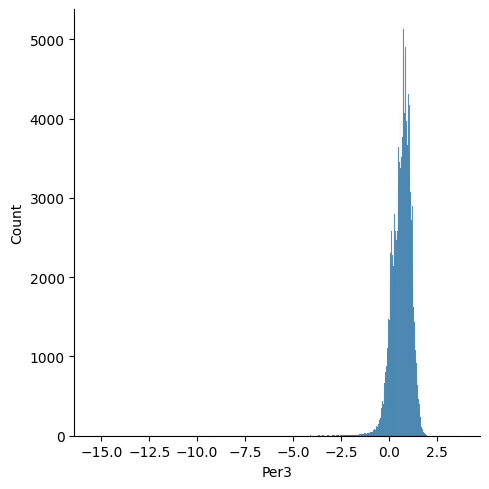

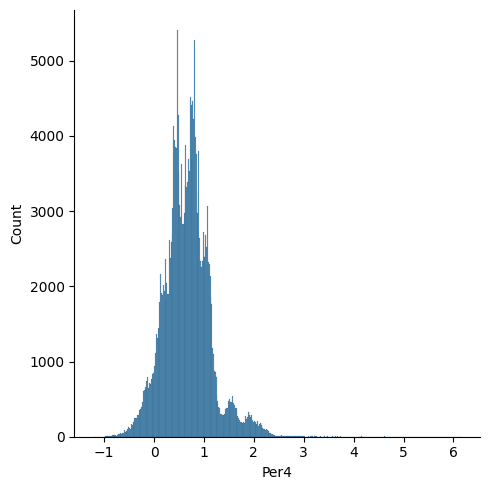

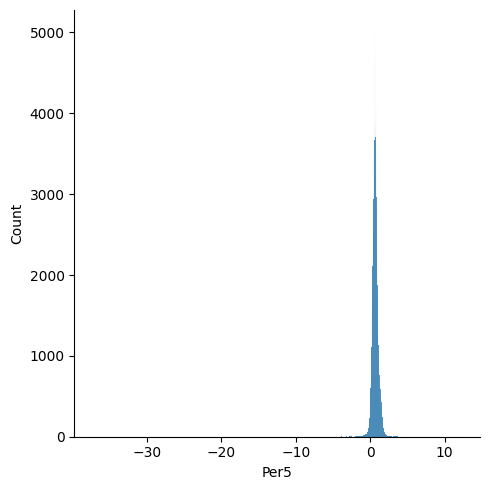

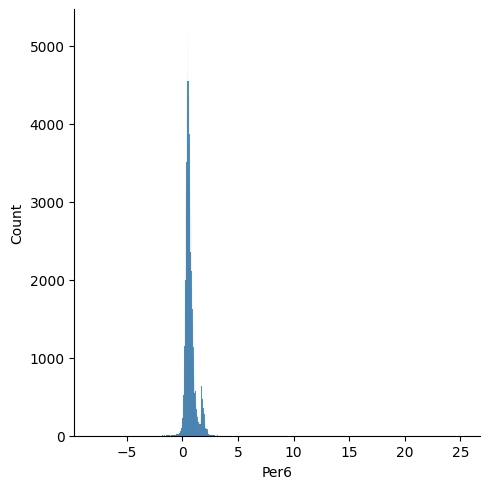

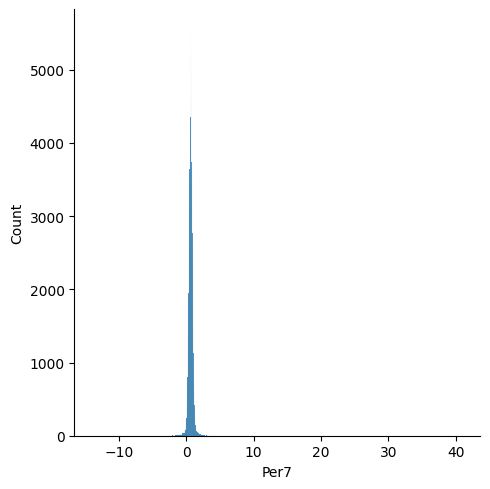

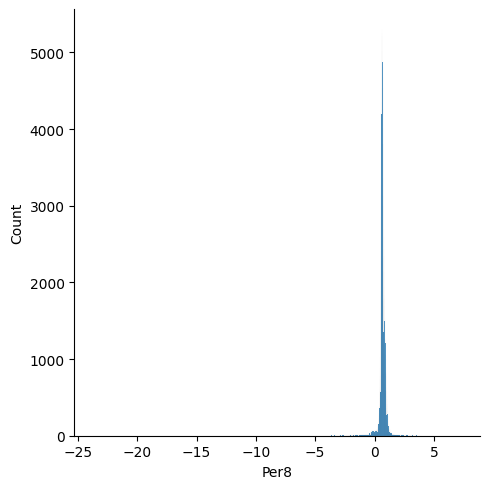

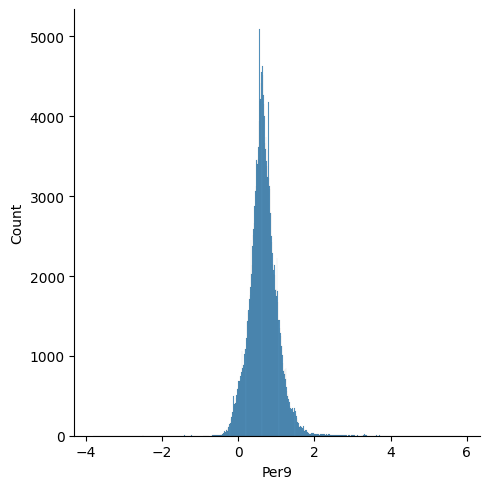

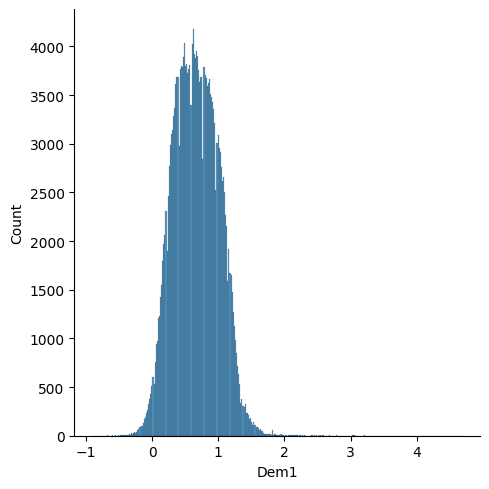

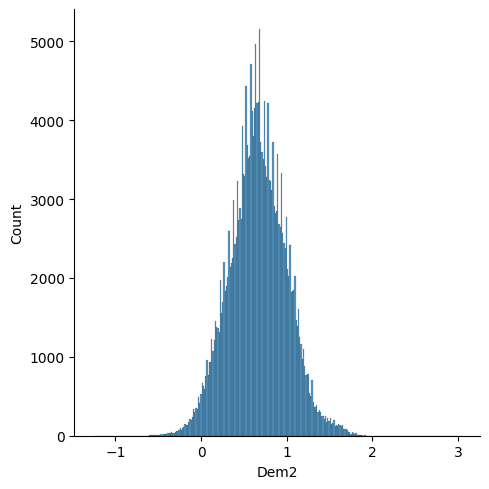

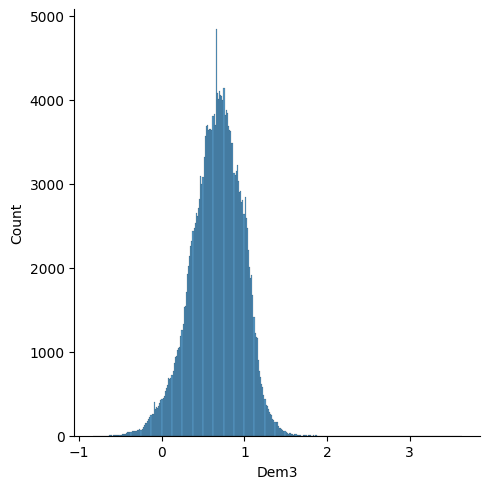

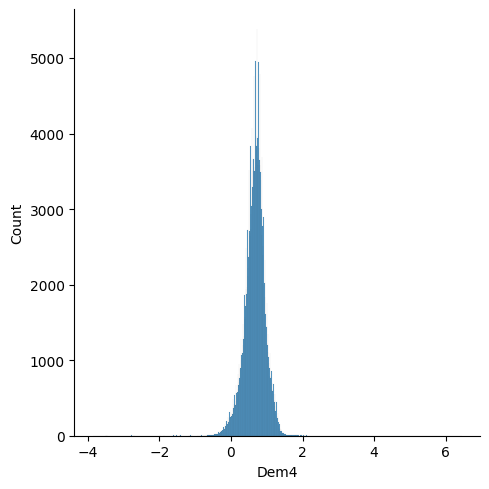

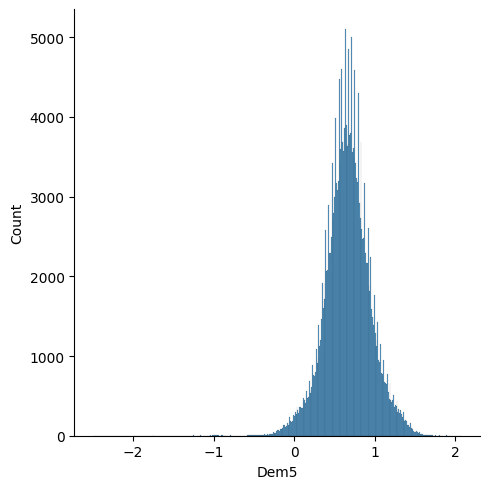

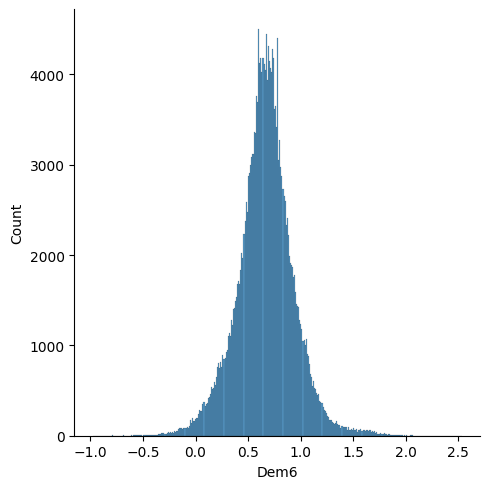

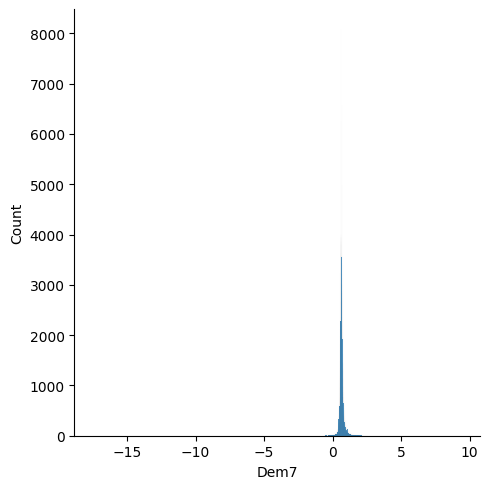

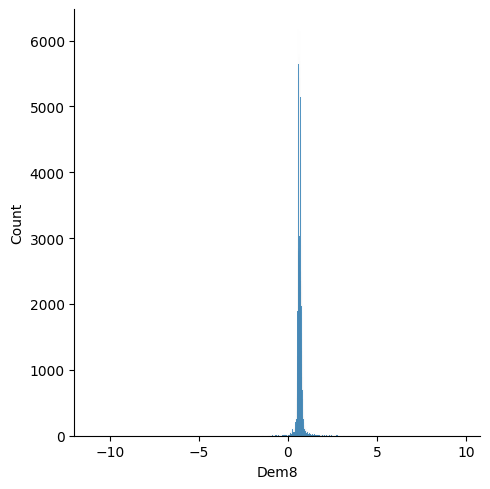

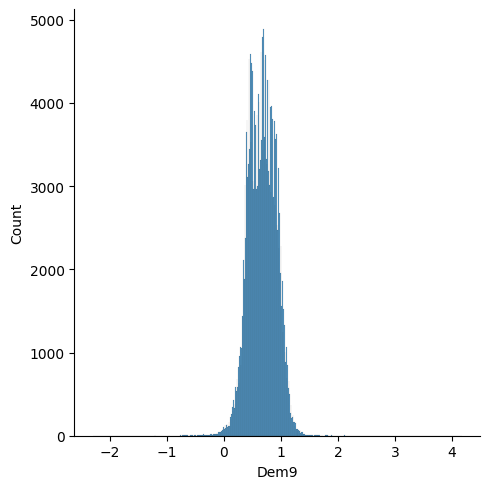

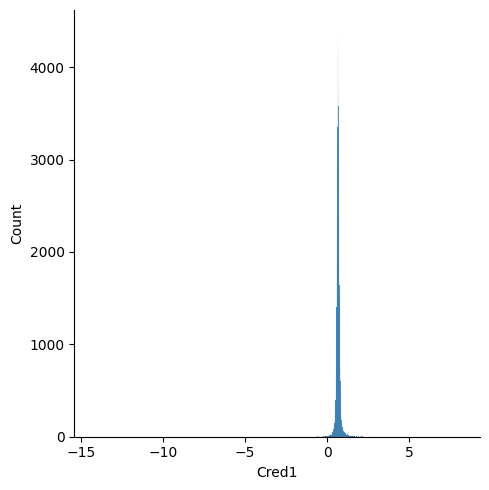

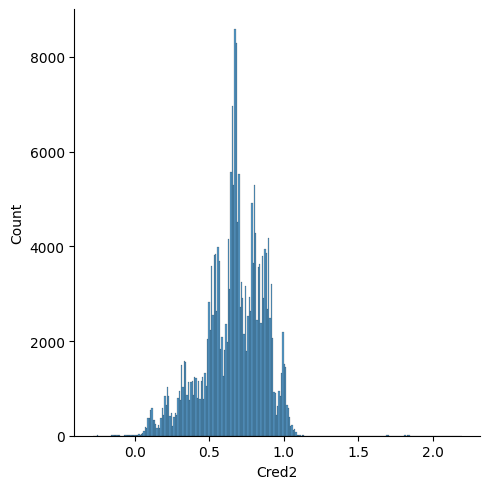

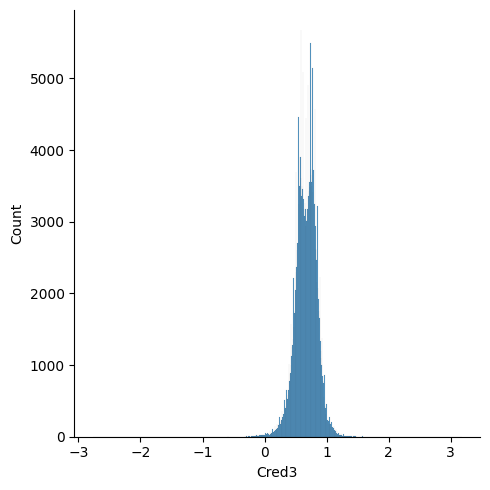

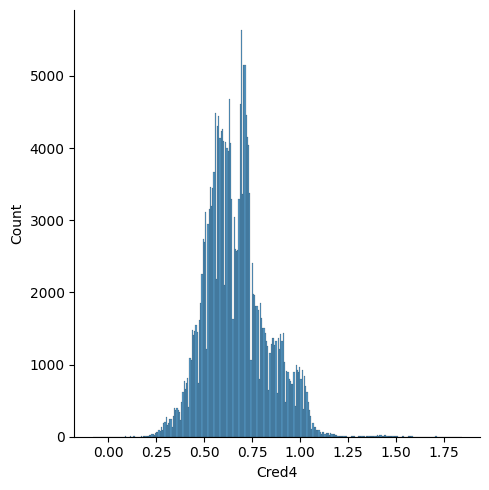

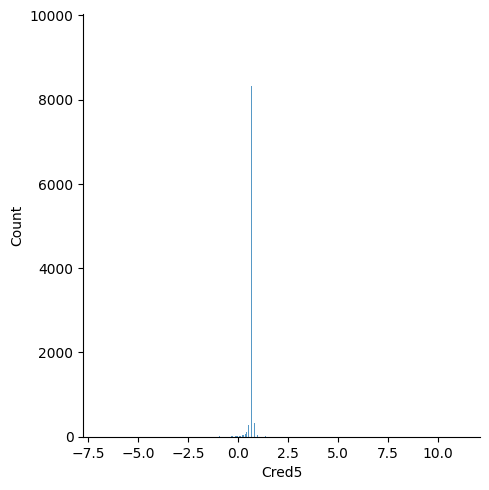

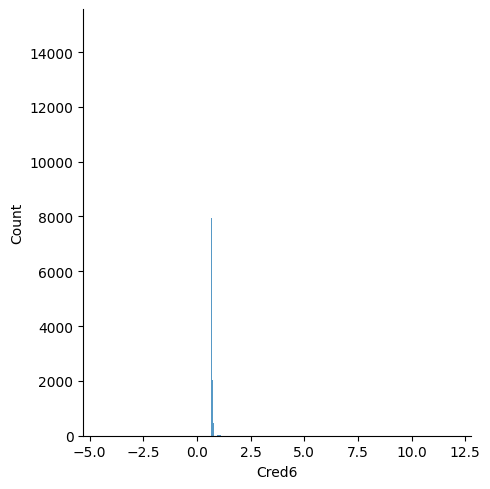

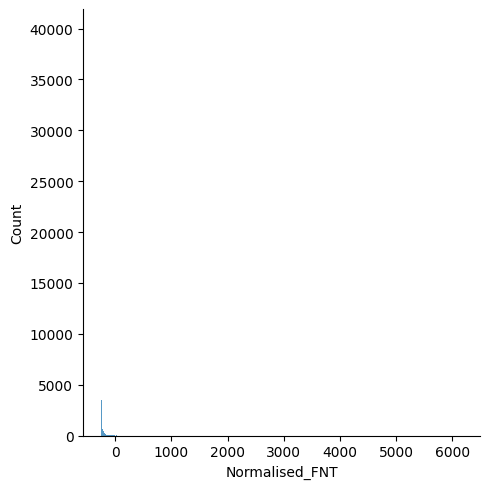

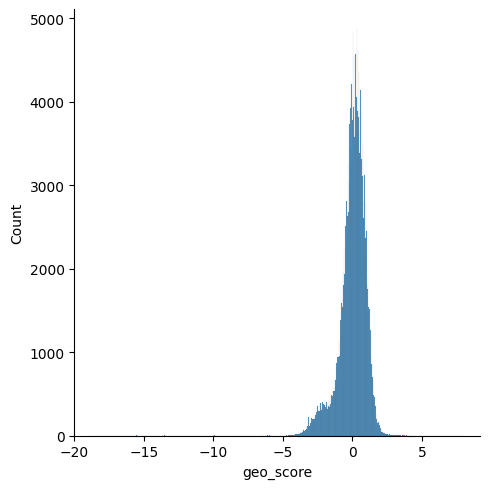

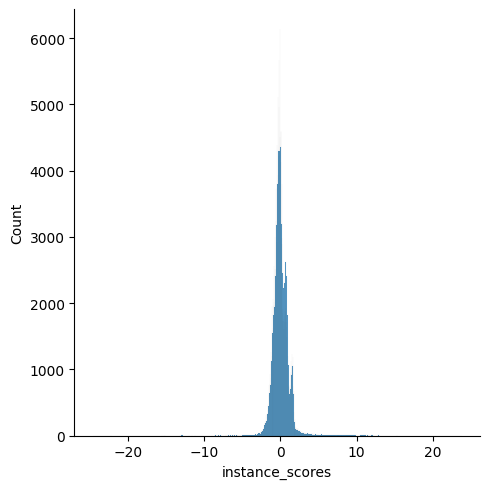

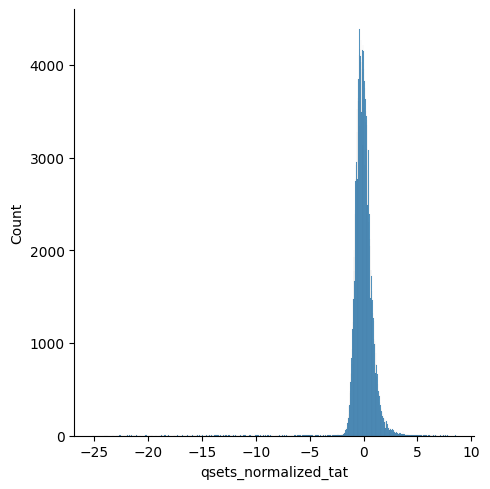

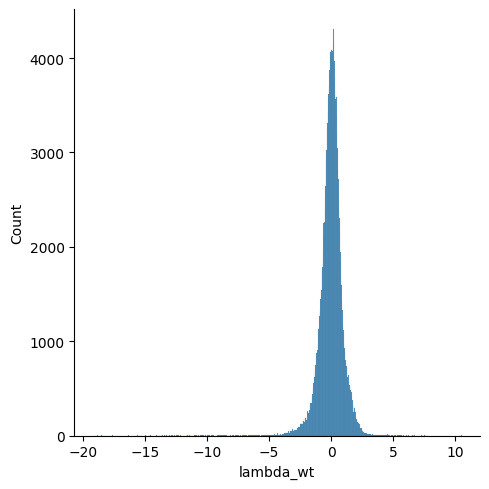

In [56]:
#plotting a distribution graph
def distplots(col):
  sns.displot(x[col])
  plt.show()
for i in list(x.columns):
  distplots(i)

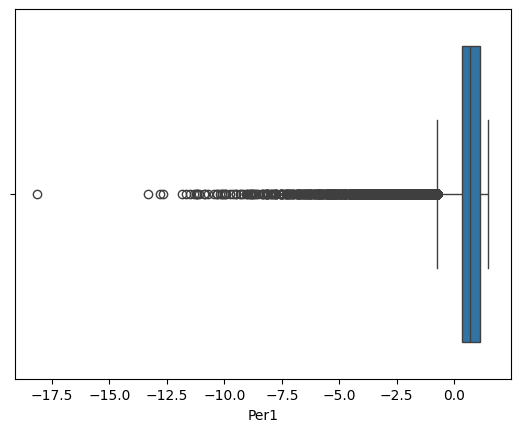

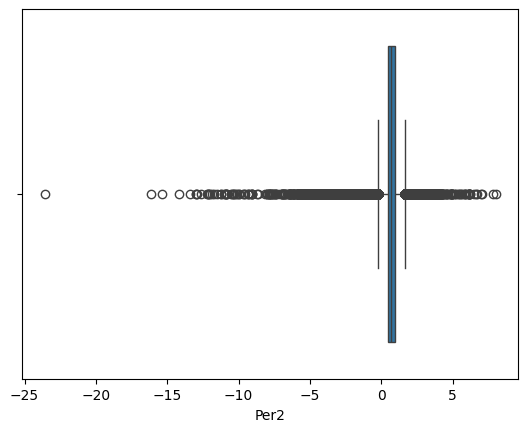

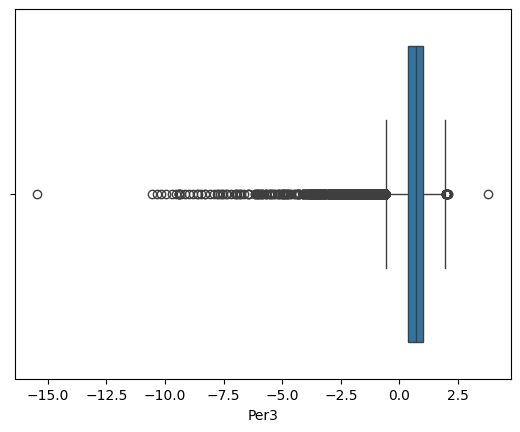

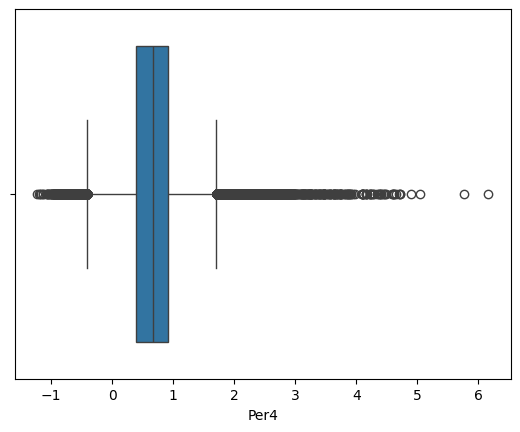

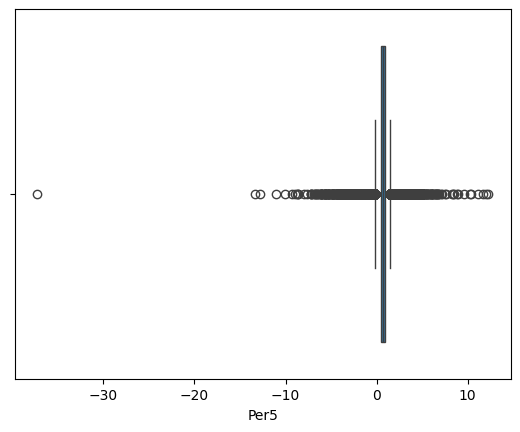

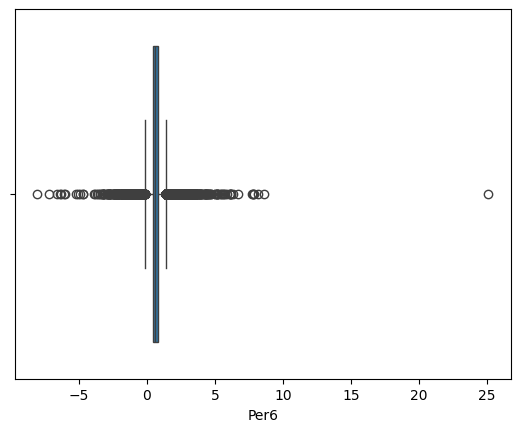

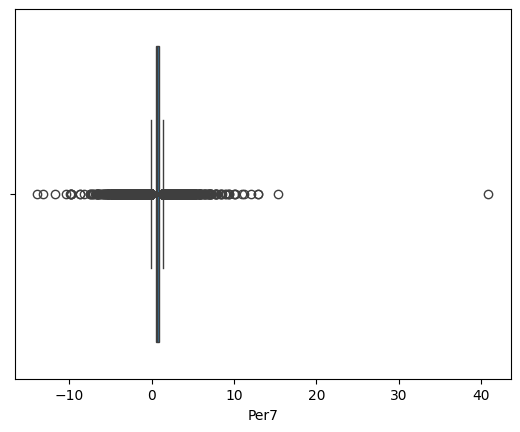

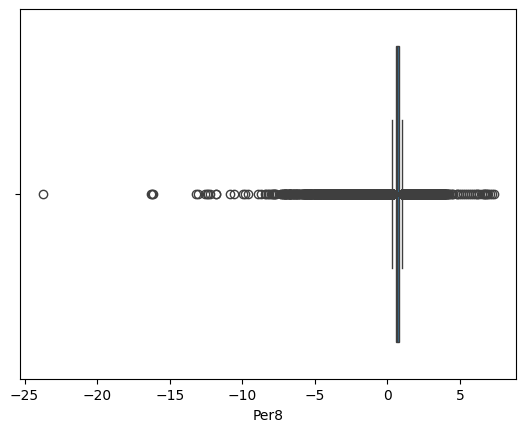

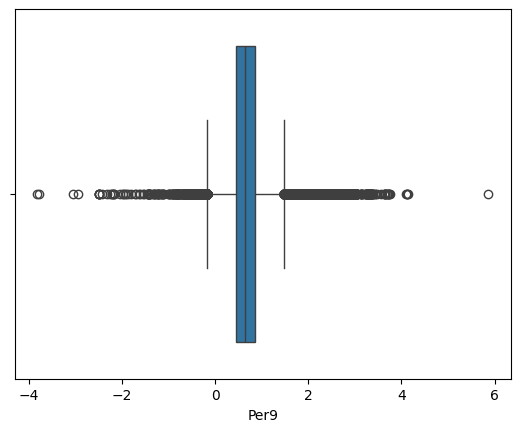

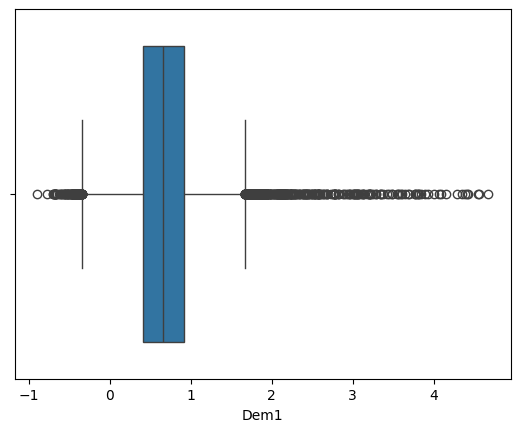

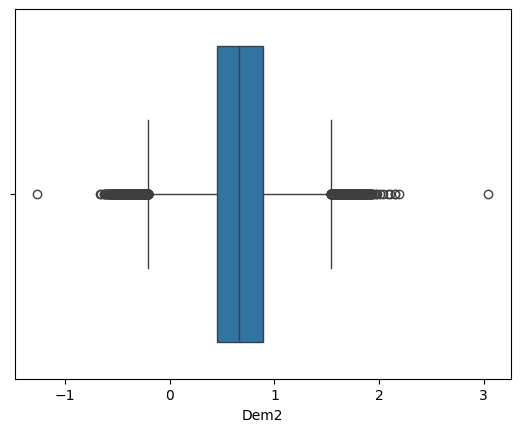

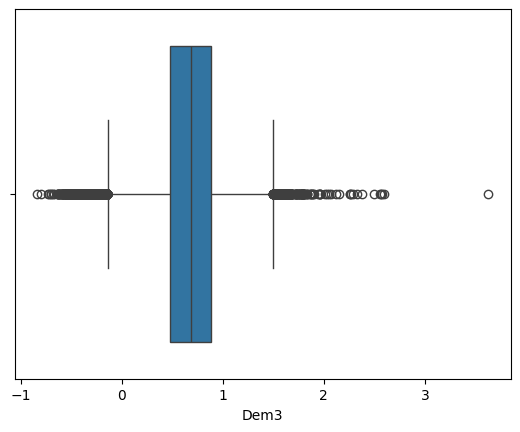

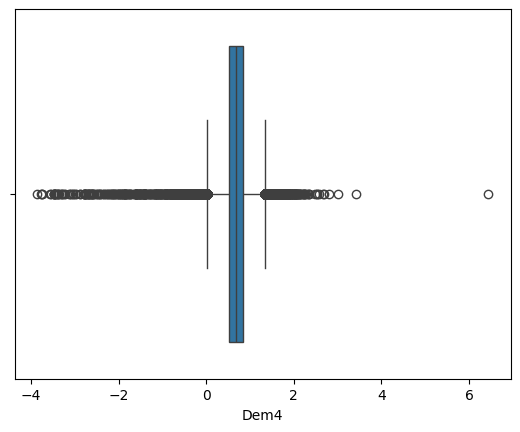

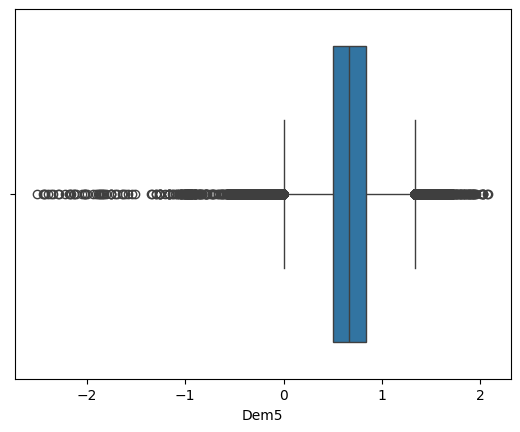

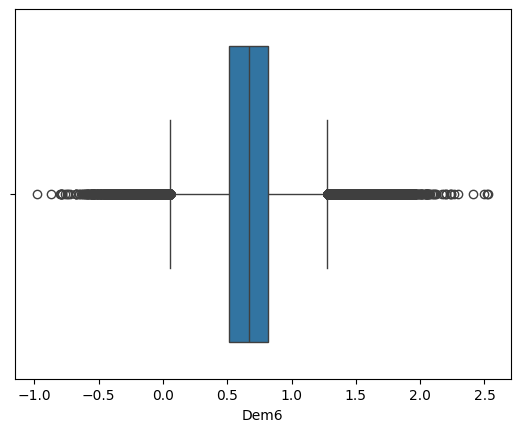

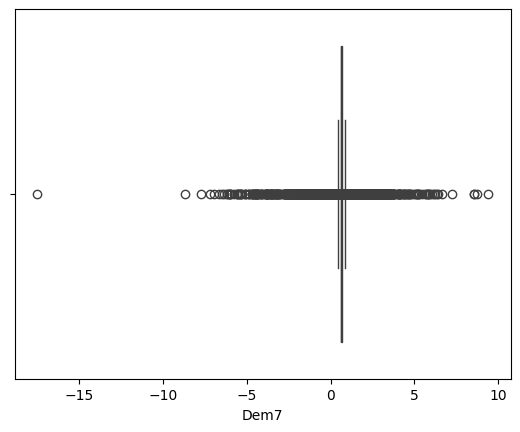

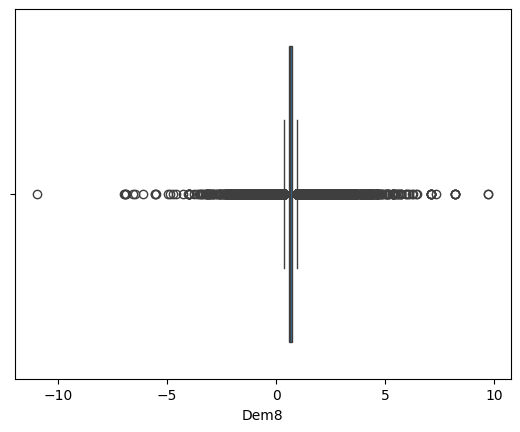

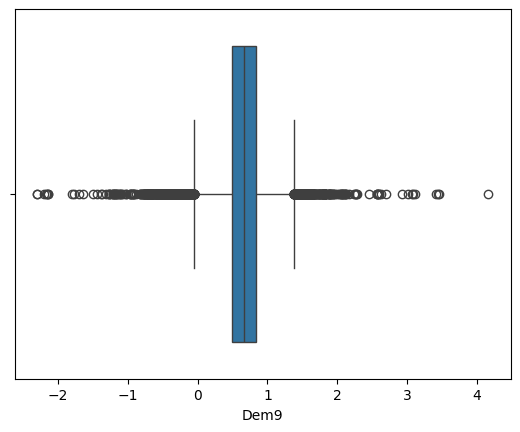

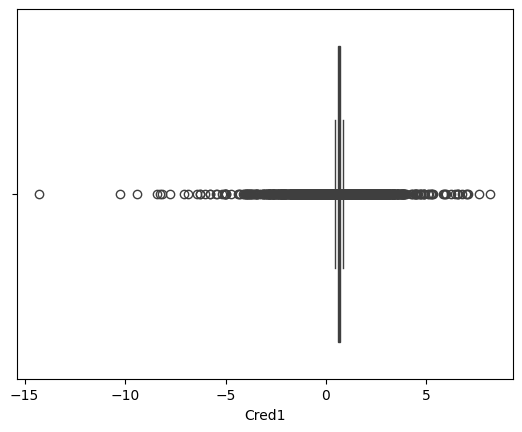

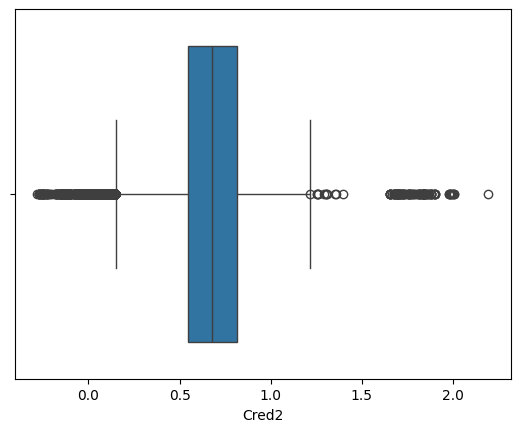

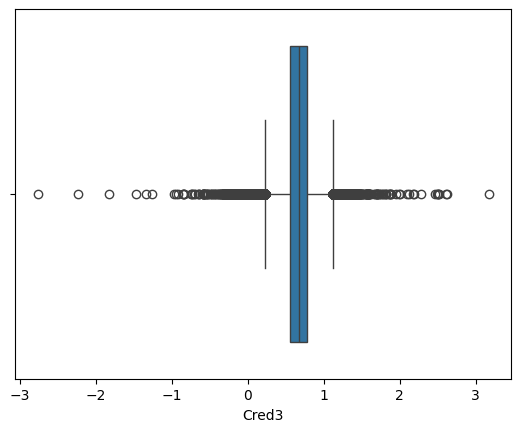

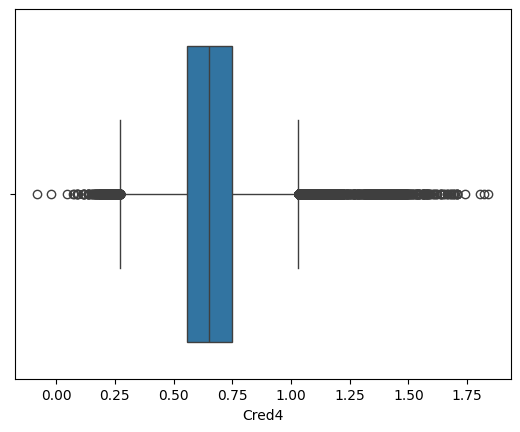

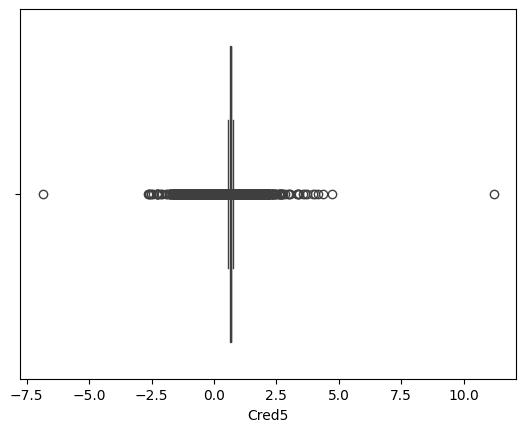

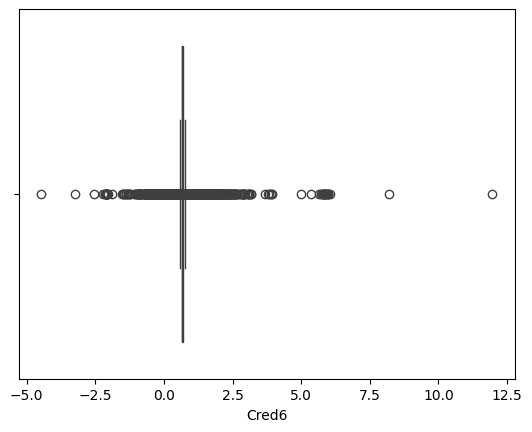

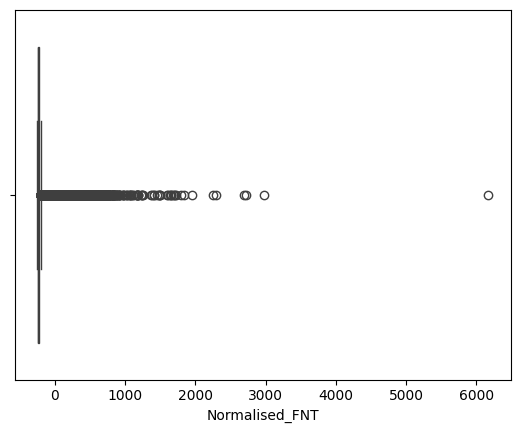

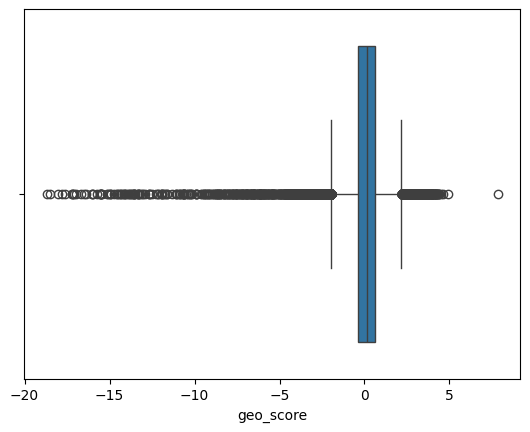

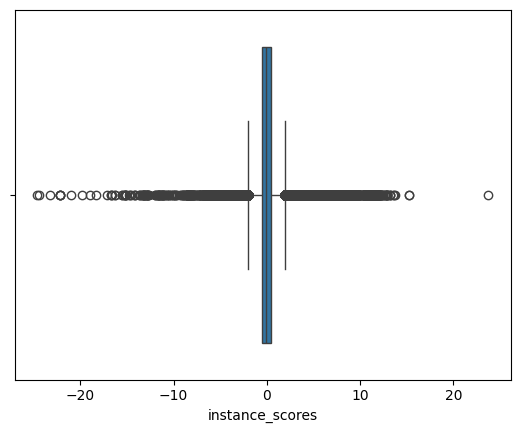

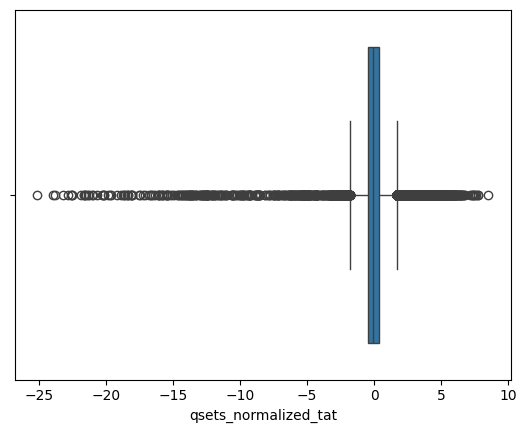

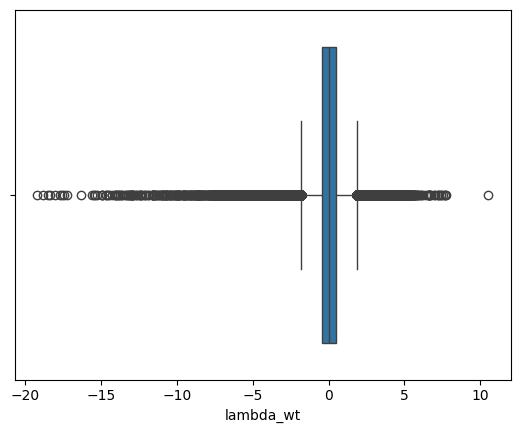

In [57]:
def bxplot(col):
  sns.boxplot(x=x[col])
  plt.show()

for i in list(x.select_dtypes(exclude=['object']).columns):
  bxplot(i)

In [58]:
x.describe()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,0.666006,0.667701,0.666315,0.666687,0.666723,0.667378,0.666934,0.666279,0.666688,0.666576,...,0.666264,0.666755,0.666878,0.666566,0.666776,-227.954170,0.008908,-0.000123,0.001346,0.000350
std,0.654133,0.548305,0.506357,0.471956,0.461393,0.444573,0.415657,0.401546,0.366537,0.340436,...,0.202204,0.174204,0.160803,0.135762,0.111612,61.951661,0.997629,1.091488,0.850169,0.957957
min,-18.136667,-23.573333,-15.443333,-1.226667,-37.246667,-8.053333,-13.853333,-23.740000,-3.810000,-0.893333,...,-0.280000,-2.766667,-0.080000,-6.856667,-4.476667,-250.000000,-18.680000,-24.590000,-25.156000,-19.210000
25%,0.360000,0.470000,0.370000,0.383333,0.436667,0.410000,0.483333,0.596667,0.453333,0.413333,...,0.546667,0.560000,0.556667,0.643333,0.650000,-248.617500,-0.400000,-0.540000,-0.480000,-0.430000
50%,0.670000,0.690000,0.726667,0.660000,0.650000,0.576667,0.680000,0.673333,0.650000,0.656667,...,0.680000,0.673333,0.650000,0.666667,0.670000,-244.510000,0.150000,-0.090000,-0.066000,0.050000
75%,1.103333,0.933333,1.010000,0.913333,0.870000,0.800000,0.856667,0.776667,0.866667,0.913333,...,0.813333,0.783333,0.746667,0.696667,0.693333,-230.750000,0.630000,0.450000,0.400000,0.490000
max,1.483333,8.020000,3.793333,6.163333,12.266667,25.100000,40.863333,7.336667,5.863333,4.673333,...,2.193333,3.173333,1.840000,11.203333,11.950000,6172.790000,7.850000,23.750000,8.540000,10.530000


In [59]:
#imbalance check
y.value_counts()

0.0    227451
1.0       394
Name: Target, dtype: int64

In [60]:
394/(394+227451)*100

0.17292457591783889

In [61]:
227451/(227451+394)*100

99.82707542408215

In [62]:
#spliting the data set into train and test and handling the imbalance in the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)

In [63]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(182276, 29) (45569, 29) (182276,) (45569,)


In [64]:
x_train.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
225122,1.353333,0.570000,0.246667,0.763333,0.596667,0.330000,0.676667,0.583333,1.070000,0.256667,...,0.656667,0.760000,0.763333,0.656667,0.643333,-249.7500,0.06,-0.16,0.074,0.27
61988,0.646667,0.976667,0.176667,0.670000,1.000000,0.530000,0.916667,0.693333,-0.050000,0.083333,...,0.673333,0.430000,0.500000,0.810000,0.753333,-243.7500,-0.06,0.81,-0.040,0.71
197455,-2.083333,-1.453333,1.186667,2.273333,2.750000,-0.560000,-0.923333,-0.246667,0.820000,0.513333,...,0.916667,0.700000,0.716667,1.056667,1.113333,-236.8450,0.90,2.10,0.150,-0.52
116736,0.356667,1.100000,1.216667,1.160000,0.833333,0.373333,1.210000,0.593333,0.076667,0.506667,...,0.900000,0.906667,0.653333,0.650000,0.686667,-231.1725,-0.42,-0.11,-0.570,0.42
169019,-1.043333,2.173333,0.016667,1.023333,-0.040000,1.786667,-1.933333,-4.236667,0.406667,0.146667,...,0.880000,0.433333,0.700000,0.613333,0.883333,-246.1875,2.37,-2.00,1.444,2.29


# Model Building

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

# Logistic Regression

In [66]:
log=LogisticRegression()
lr=log.fit(x_train, y_train)
y_pred_train= log.predict(x_train)
y_pred_test= log.predict(x_test)

In [67]:
#confusion matrix
print(confusion_matrix(y_train, y_pred_train))
print(confusion_matrix(y_test, y_pred_test))

[[181936     25]
 [   132    183]]
[[45485     5]
 [   31    48]]


In [68]:
# classification_report
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       0.88      0.58      0.70       315

    accuracy                           1.00    182276
   macro avg       0.94      0.79      0.85    182276
weighted avg       1.00      1.00      1.00    182276

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.91      0.61      0.73        79

    accuracy                           1.00     45569
   macro avg       0.95      0.80      0.86     45569
weighted avg       1.00      1.00      1.00     45569



In [69]:
#accuracy score
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9991386688318813
0.9992099892470758


In [109]:
outlier_fraction = 394 / (394+227451)
outlier_fraction

0.001729245759178389

# Decision Tree Classifier

In [70]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='entropy')
dt=dtree.fit(x_train, y_train)
y_pred_train_dt=dtree.predict(x_train)
y_pred_test_dt=dtree.predict(x_test)


In [71]:
#confusion matrix
print(confusion_matrix(y_train, y_pred_train_dt))
print(confusion_matrix(y_test, y_pred_test_dt))

[[181961      0]
 [     0    315]]
[[45474    16]
 [   19    60]]


In [72]:
#classification report
print(classification_report(y_train, y_pred_train_dt))
print(classification_report(y_test, y_pred_test_dt))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      1.00      1.00       315

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.79      0.76      0.77        79

    accuracy                           1.00     45569
   macro avg       0.89      0.88      0.89     45569
weighted avg       1.00      1.00      1.00     45569



In [73]:
#accuracy score
print(accuracy_score(y_train, y_pred_train_dt))
print(accuracy_score(y_test, y_pred_test_dt))

1.0
0.9992319339902126


# Random Forest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier
rforest=RandomForestClassifier()
rf=rforest.fit(x_train, y_train)
y_pred_train_rf=rforest.predict(x_train)
y_pred_test_rf=rforest.predict(x_test)

In [75]:
#confusion matrix
print(confusion_matrix(y_train, y_pred_train_rf))
print(confusion_matrix(y_test, y_pred_test_rf))

[[181961      0]
 [     0    315]]
[[45486     4]
 [   20    59]]


In [76]:
#classification report
print(classification_report(y_train, y_pred_train_rf))
print(classification_report(y_train, y_pred_train_rf))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      1.00      1.00       315

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      1.00      1.00       315

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276



In [77]:
#accuracy
print(accuracy_score(y_train, y_pred_train_rf))
print(accuracy_score(y_test, y_pred_test_rf))

1.0
0.9994733261647173


# XGBoost Classifier

In [78]:
from xgboost import XGBClassifier
xgboost=XGBClassifier()
xg=xgboost.fit(x_train, y_train)
y_pred_train_xgb=xgboost.predict(x_train)
y_pred_test_xgb=xgboost.predict(x_test)

In [79]:
#confusion matrix
print(confusion_matrix(y_train,y_pred_train_xgb))
print(confusion_matrix(y_test,y_pred_test_xgb))

[[181961      0]
 [     0    315]]
[[45487     3]
 [   18    61]]


In [80]:
#classification report
print(classification_report(y_train, y_pred_train_xgb))
print(classification_report(y_test, y_pred_test_xgb))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      1.00      1.00       315

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.95      0.77      0.85        79

    accuracy                           1.00     45569
   macro avg       0.98      0.89      0.93     45569
weighted avg       1.00      1.00      1.00     45569



In [81]:
#accuracy score
print(accuracy_score(y_train, y_pred_train_xgb))
print(accuracy_score(y_test, y_pred_test_xgb))

1.0
0.9995391603941276


# Support Vector Machine

In [82]:
from sklearn.svm import SVC
SVClass=SVC()
svm=SVClass.fit(x_train, y_train)
y_pred_train_svm=SVClass.predict(x_train)
y_pred_test_svm=SVClass.predict(x_test)

In [83]:
#confusion matrix
print(confusion_matrix(y_train, y_pred_train_svm))
print(confusion_matrix(y_test, y_pred_test_svm))

[[181935     26]
 [   206    109]]
[[45485     5]
 [   58    21]]


In [84]:
#classification report
print(classification_report(y_train, y_pred_train_svm))
print(classification_report(y_test, y_pred_test_svm))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       0.81      0.35      0.48       315

    accuracy                           1.00    182276
   macro avg       0.90      0.67      0.74    182276
weighted avg       1.00      1.00      1.00    182276

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.81      0.27      0.40        79

    accuracy                           1.00     45569
   macro avg       0.90      0.63      0.70     45569
weighted avg       1.00      1.00      1.00     45569



In [85]:
#accuracy score
print(accuracy_score(y_train, y_pred_train_svm))
print(accuracy_score(y_test, y_pred_test_svm))

0.9987272048980667
0.9986174811823828


# K Nearest Neighbour

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn=knn_model.fit(x_train, y_train)
y_pred_train_knn=knn_model.predict(x_train)
y_pred_test_knn=knn_model.predict(x_test)

In [87]:
#confusion matrix
print(confusion_matrix(y_train, y_pred_train_knn))
print(confusion_matrix(y_test, y_pred_test_knn))

[[181948     13]
 [    74    241]]
[[45486     4]
 [   23    56]]


In [88]:
#classification report
print(classification_report(y_train, y_pred_train_knn))
print(classification_report(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       0.95      0.77      0.85       315

    accuracy                           1.00    182276
   macro avg       0.97      0.88      0.92    182276
weighted avg       1.00      1.00      1.00    182276

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.93      0.71      0.81        79

    accuracy                           1.00     45569
   macro avg       0.97      0.85      0.90     45569
weighted avg       1.00      1.00      1.00     45569



In [89]:
#accuracy score
print(accuracy_score(y_train, y_pred_train_knn))
print(accuracy_score(y_test, y_pred_test_knn))

0.999522701836775
0.9994074919353069


# Naive Bayes Theorem

In [90]:
from sklearn.naive_bayes import BernoulliNB
bernb=BernoulliNB()
bnb=bernb.fit(x_train, y_train)
y_pred_train_nb=bernb.predict(x_train)
y_pred_test_nb=bernb.predict(x_test)

In [91]:
#Confusion matrix
print(confusion_matrix(y_train, y_pred_train_nb))
print(confusion_matrix(y_test, y_pred_test_nb))

[[181556    405]
 [    94    221]]
[[45397    93]
 [   27    52]]


In [92]:
#classification report
print(classification_report(y_train, y_pred_train_nb))
print(classification_report(y_test, y_pred_test_nb))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       0.35      0.70      0.47       315

    accuracy                           1.00    182276
   macro avg       0.68      0.85      0.73    182276
weighted avg       1.00      1.00      1.00    182276

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.36      0.66      0.46        79

    accuracy                           1.00     45569
   macro avg       0.68      0.83      0.73     45569
weighted avg       1.00      1.00      1.00     45569



In [93]:
#accuracy score
print(accuracy_score(y_train, y_pred_train_nb))
print(accuracy_score(y_test, y_pred_test_nb))

0.9972623932936865
0.9973666308235862


# Voting Classifier

In [94]:
from sklearn.ensemble import VotingClassifier

In [95]:
voting = VotingClassifier(estimators=[('logit', lr ),('dtree', dt),('rforest', rf),('knn',knn),('xgboost', xg),
                                     ("svm", svm),("bnb",bnb)])
voting_evc=voting.fit(x_train, y_train)
y_pred_train_voting = voting.predict(x_train)
y_pred_test_voting = voting.predict(x_test)

In [96]:
#confusion matrix
print(confusion_matrix(y_train, y_pred_train_voting))
print(confusion_matrix(y_test, y_pred_test_voting))

[[181957      4]
 [    56    259]]
[[45487     3]
 [   20    59]]


In [97]:
#classification report
print(classification_report(y_train, y_pred_train_voting))
print(classification_report(y_test, y_pred_test_voting))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       0.98      0.82      0.90       315

    accuracy                           1.00    182276
   macro avg       0.99      0.91      0.95    182276
weighted avg       1.00      1.00      1.00    182276

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.95      0.75      0.84        79

    accuracy                           1.00     45569
   macro avg       0.98      0.87      0.92     45569
weighted avg       1.00      1.00      1.00     45569



In [98]:
#accuracy score
print("Train Accuracy", accuracy_score(y_train, y_pred_train_voting))
print("Test Accuracy", accuracy_score(y_test, y_pred_test_voting))

Train Accuracy 0.9996708288529482
Test Accuracy 0.9994952709078541


In [99]:
accuracy_logit = accuracy_score(y_test, y_pred_test)
accuracy_dtree = accuracy_score(y_test, y_pred_test_dt)
accuracy_rf = accuracy_score(y_test, y_pred_test_rf)
accuracy_xgb = accuracy_score(y_test, y_pred_test_xgb)
accuracy_svm = accuracy_score(y_test, y_pred_test_svm)
accuracy_bnb = accuracy_score(y_test, y_pred_test_nb)
accuracy_voting = accuracy_score(y_test, y_pred_test_voting)

  Method Used  Accuracy
0    Logistic  0.999210
1       Dtree  0.999232
2     RForest  0.999473
3     XGBoost  0.999539
4         SVM  0.998617
5         BNB  0.997367
6      Voting  0.999495
Axes(0.125,0.11;0.775x0.77)


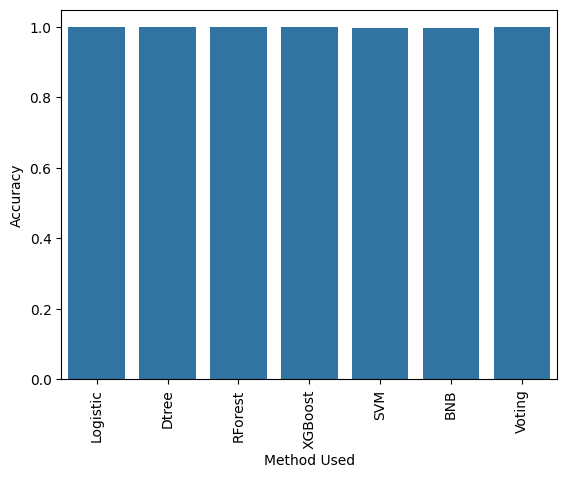

In [100]:
point1 = ["Logistic", 'Dtree','RForest','XGBoost','SVM','BNB','Voting']
point2 = [accuracy_logit,accuracy_dtree,accuracy_rf,accuracy_xgb,accuracy_svm,accuracy_bnb,accuracy_voting]

final_output = pd.DataFrame({"Method Used": point1, "Accuracy":point2})
print(final_output)

# visualization

chart = sns.barplot(x="Method Used", y="Accuracy", data=final_output)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)

# Stacking Method

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

In [102]:
estimators = [('rf', RandomForestClassifier()),
             ('gdbt',GradientBoostingClassifier()),
             ('nbt',BernoulliNB())]

In [103]:
from sklearn.ensemble import StackingClassifier

In [104]:
classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(),
                               cv=3)

In [105]:
classifier.fit(x_train, y_train)

StackingClassifier(cv=3,
                   estimators=[('rf', RandomForestClassifier()),
                               ('gdbt', GradientBoostingClassifier()),
                               ('nbt', BernoulliNB())],
                   final_estimator=LogisticRegression())

In [105]:
y_pred_train = classifier.predict(x_train)
y_pred_test = classifier.predict(x_test)

In [106]:
# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train))
print()
print(confusion_matrix(y_test, y_pred_test))
print()
# classification_report
print(classification_report(y_train, y_pred_train))
print()
print(classification_report(y_test, y_pred_test))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train))
print()
print("Test Accuracy", accuracy_score(y_test, y_pred_test))

[[181936     25]
 [   132    183]]

[[45485     5]
 [   31    48]]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       0.88      0.58      0.70       315

    accuracy                           1.00    182276
   macro avg       0.94      0.79      0.85    182276
weighted avg       1.00      1.00      1.00    182276


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.91      0.61      0.73        79

    accuracy                           1.00     45569
   macro avg       0.95      0.80      0.86     45569
weighted avg       1.00      1.00      1.00     45569


Train Accuracy 0.9991386688318813

Test Accuracy 0.9992099892470758


# Anomaly Detection - Isolation Forest Classifier

In [107]:
from sklearn.ensemble import IsolationForest

In [110]:
isolation = IsolationForest(contamination=outlier_fraction)
isolation.fit(x_train, y_train)

IsolationForest(contamination=0.001729245759178389)

In [111]:
anomaly_pred_train = isolation.predict(x_train)
anomaly_pred_test = isolation.predict(x_test)

In [112]:
pd.DataFrame(anomaly_pred_test).value_counts()

 1    45489
-1       80
dtype: int64

In [113]:
# Confusion Matrix
print(confusion_matrix(y_train, anomaly_pred_train))
print()
print(confusion_matrix(y_test, anomaly_pred_test))
print()
# classification_report
print(classification_report(y_train, anomaly_pred_train))
print()
print(classification_report(y_test, anomaly_pred_test))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(y_train, anomaly_pred_train))
print()
print("Test Accuracy", accuracy_score(y_test, anomaly_pred_test))

[[     0      0      0]
 [   234      0 181727]
 [    82      0    233]]

[[    0     0     0]
 [   64     0 45426]
 [   16     0    63]]

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00    181961
         1.0       0.00      0.74      0.00       315

    accuracy                           0.00    182276
   macro avg       0.00      0.25      0.00    182276
weighted avg       0.00      0.00      0.00    182276


              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00     45490
         1.0       0.00      0.80      0.00        79

    accuracy                           0.00     45569
   macro avg       0.00      0.27      0.00     45569
weighted avg       0.00      0.00      0.00     45569


Train Accuracy 0.0012782812877175274

Test Accuracy 0.0013825188176172399


In [114]:
#iso_model = IsolationForest(contamination=0.001)
#iso_model.fit(x_train, y_train)
#anomaly_pred = iso_model.predict(x_test)

for i, x in enumerate(x_test):
    if anomaly_pred_test[i] == 1:
        print(f"Anomaly Detected:{x}")
    else:
        print(f"Normal Transaction:{x}")

Anomaly Detected:Per1
Anomaly Detected:Per2
Anomaly Detected:Per3
Anomaly Detected:Per4
Anomaly Detected:Per5
Anomaly Detected:Per6
Anomaly Detected:Per7
Anomaly Detected:Per8
Anomaly Detected:Per9
Anomaly Detected:Dem1
Anomaly Detected:Dem2
Anomaly Detected:Dem3
Anomaly Detected:Dem4
Anomaly Detected:Dem5
Anomaly Detected:Dem6
Anomaly Detected:Dem7
Anomaly Detected:Dem8
Anomaly Detected:Dem9
Anomaly Detected:Cred1
Anomaly Detected:Cred2
Anomaly Detected:Cred3
Anomaly Detected:Cred4
Anomaly Detected:Cred5
Anomaly Detected:Cred6
Anomaly Detected:Normalised_FNT
Anomaly Detected:geo_score
Anomaly Detected:instance_scores
Anomaly Detected:qsets_normalized_tat
Anomaly Detected:lambda_wt


In [115]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [116]:
len(x)

9

In [117]:
final_classification_model = {"IsolationForest": IsolationForest(n_estimators=100,contamination=outlier_fraction, max_samples=len(x)),
                                                                "LocalOutlierFactor" : LocalOutlierFactor(contamination=outlier_fraction),
                                                                "OneClassSVM" : OneClassSVM()}

In [118]:
train_data.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data', 'geo_score', 'instance_scores',
       'qsets_normalized_tat', 'lambda_wt'],
      dtype='object')

In [119]:
test_data.columns

Index(['Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7', 'Per8', 'Per9',
       'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7', 'Dem8', 'Dem9',
       'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6', 'Normalised_FNT',
       'geo_score', 'instance_scores', 'qsets_normalized_tat', 'lambda_wt'],
      dtype='object')

In [120]:
fraud = train_data[train_data['Target']==1]
normal = train_data[train_data['Target']==0]

In [121]:
 len(fraud)

394

In [122]:
total_outlier_found = len(fraud)

for i , (clf_name, clf) in enumerate(final_classification_model.items()):
    if clf_name =="LocalOutlierFactor" :
        y_pred = clf.fit_predict(x_test)
        score_prediction = clf.negative_outlier_factor_
    elif clf_name =="OneClassSVM":
        clf.fit(x_train)
        y_pred = clf.predict(x_test)

    else:
        clf.fit(x_train)
        score_prediction = clf.decision_function(x_train)
        y_pred = clf.predict(x_test)

    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_error = (y_pred !=y_test).sum()

    print("{} : {}".format(clf_name, n_error))
    print("Accuracy Score :")

    print(accuracy_score(y_test, y_pred))

IsolationForest : 123
Accuracy Score :
0.9973007965941759
LocalOutlierFactor : 128
Accuracy Score :
0.997191072878492
OneClassSVM : 22719
Accuracy Score :
0.5014373806754592
